# Decision Tree - Heart Disease - to determine top Features

In [66]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import make_moons
import warnings
warnings.filterwarnings('ignore')

# Loading and Processing Data

In [67]:
# Import cleaned preprocessed data
heart_data = pd.read_csv("resources/heartdisease.csv")
heart_data.head()

,Unnamed: 0,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting EKG,Max Heart Rate,Exercise Enduced Chest Pain,STDep Induced by Exercise,Slope of Peak Exercise ST,Diagnosis
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [68]:
# Further clean data - remove "Unnamed: 0" column
heart_data = heart_data.drop(columns=['Unnamed: 0'])

# Verify
heart_data.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting EKG', 'Max Heart Rate',
       'Exercise Enduced Chest Pain', 'STDep Induced by Exercise',
       'Slope of Peak Exercise ST', 'Diagnosis'],
      dtype='object')

In [69]:
# Change values
heart_data['Diagnosis'].values[heart_data['Diagnosis'] > 0] = 1

# Verify
heart_data['Diagnosis'].head()

0    0
1    1
2    1
3    0
4    0
Name: Diagnosis, dtype: int64

In [70]:
# Change Diagnosis column so we only have 0 and 1 (absense and presence)
# Copy data
heart_new = heart_data.copy()

heart_new['Diagnosis'].head()

0    0
1    1
2    1
3    0
4    0
Name: Diagnosis, dtype: int64

In [71]:
#create data frame for yes/no diagnosis
dgHeartData = heart_data['Diagnosis'].values[heart_data['Diagnosis'] > 0] = 1

# Verify
heart_data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting EKG,Max Heart Rate,Exercise Enduced Chest Pain,STDep Induced by Exercise,Slope of Peak Exercise ST,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [72]:
# Define features set
X = heart_data.copy()
X.drop('Diagnosis', axis=1, inplace=True)
X.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting EKG,Max Heart Rate,Exercise Enduced Chest Pain,STDep Induced by Exercise,Slope of Peak Exercise ST
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0


In [73]:
# Define target vector
y = heart_data['Diagnosis'].values.reshape(-1, 1)
y[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]])

In [74]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [75]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [76]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [77]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Decision Tree Model

In [78]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [79]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making Predictions Using the Tree Model

In [80]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Model Evaluation

In [81]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [82]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,22
Actual 1,29,41


Accuracy Score : 0.5952380952380952
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        56
           1       0.65      0.59      0.62        70

    accuracy                           0.60       126
   macro avg       0.60      0.60      0.59       126
weighted avg       0.60      0.60      0.60       126



# Fitting the Random Forest Model

In [83]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [84]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

/Users/steph/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Making Predictions Using the Random Forest Model

In [85]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Model Evaluation

In [86]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [87]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,37,19
Actual 1,14,56


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        56
           1       0.75      0.80      0.77        70

    accuracy                           0.74       126
   macro avg       0.74      0.73      0.73       126
weighted avg       0.74      0.74      0.74       126



# Feature Importance - Max Heart Rate and Age

In [88]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.173560998103295, 'Max Heart Rate'),
 (0.15028365775032512, 'Age'),
 (0.13294246320226613, 'Cholesterol'),
 (0.11884737247326295, 'STDep Induced by Exercise'),
 (0.11174612016045962, 'Chest Pain Type'),
 (0.09139838556454949, 'Resting Blood Pressure'),
 (0.05859509869254996, 'Exercise Enduced Chest Pain'),
 (0.04929309570166958, 'Sex'),
 (0.04793497022219472, 'Slope of Peak Exercise ST'),
 (0.037068476255191024, 'Resting EKG'),
 (0.028329361874236562, 'Fasting Blood Sugar')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

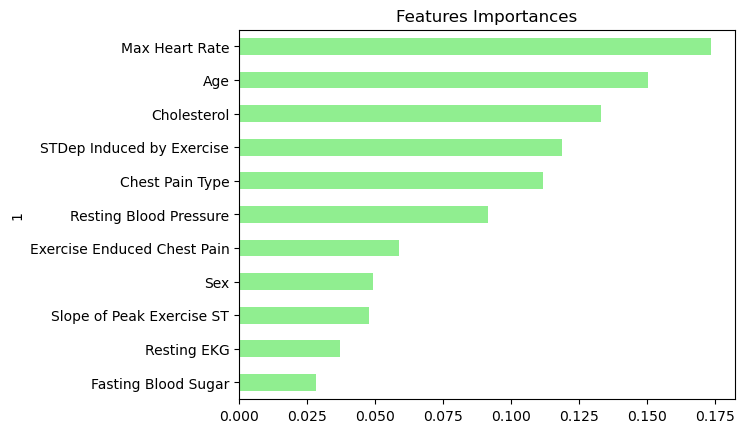

In [89]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [90]:
# Determine the number of unique values in each column.
uniqueValues = heart_data.nunique()
uniqueValues

Age                             43
Sex                              2
Chest Pain Type                  4
Resting Blood Pressure          55
Cholesterol                    180
Fasting Blood Sugar              2
Resting EKG                      3
Max Heart Rate                 106
Exercise Enduced Chest Pain      2
STDep Induced by Exercise       42
Slope of Peak Exercise ST        4
Diagnosis                        2
dtype: int64

In [91]:
# Look at  value counts to identify and delete.
MaxRate_Type = heart_data['Max Heart Rate'].value_counts()
Sorted_MaxRate = MaxRate_Type.sort_values(ascending=False)
Sorted_MaxRate.head()

Max Heart Rate
0.0      53
140.0    18
120.0    15
160.0    13
162.0    12
Name: count, dtype: int64

# Pre-Process Data and create Standard Scaler

In [92]:
#Look at Max Rate frequency less than 53 to remove 0 values. 
Sorted_MaxRate53 = Sorted_MaxRate[Sorted_MaxRate < 53]
Sorted_MaxRate53.sort_values(ascending=False)

Max Heart Rate
140.0    18
120.0    15
160.0    13
162.0    12
150.0    11
         ..
188.0     1
137.0     1
194.0     1
184.0     1
93.0      1
Name: count, Length: 105, dtype: int64

In [93]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
MaxRate_cutoff = 19
mr19 = heart_data['Max Heart Rate'].value_counts()
mr_to_replace = list(mr19[mr19 > MaxRate_cutoff].index)

# Replace in dataframe
for mr in mr_to_replace:
    heart_data['Max Heart Rate'] = heart_data['Max Heart Rate'].replace(mr,"Other")

# Check to make sure replacement was successful
heart_data['Max Heart Rate'].value_counts()

Max Heart Rate
Other    53
140.0    18
120.0    15
160.0    13
162.0    12
         ..
202.0     1
190.0     1
177.0     1
185.0     1
93.0      1
Name: count, Length: 106, dtype: int64

In [94]:
# Look at  value counts to identify and delete.
ages = heart_data['Age'].value_counts()
Sorted_Ages = ages.sort_values(ascending=False)
Sorted_Ages.head()

Age
58.0    31
57.0    27
62.0    26
63.0    24
60.0    24
Name: count, dtype: int64

In [95]:
#Convert categorical Data to numeric with 'pd.get_dummies'
converted_heart_data = pd.get_dummies(heart_data)
converted_heart_data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting EKG,Exercise Enduced Chest Pain,STDep Induced by Exercise,Slope of Peak Exercise ST,...,Max Heart Rate_185.0,Max Heart Rate_186.0,Max Heart Rate_187.0,Max Heart Rate_188.0,Max Heart Rate_190.0,Max Heart Rate_192.0,Max Heart Rate_194.0,Max Heart Rate_195.0,Max Heart Rate_202.0,Max Heart Rate_Other
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,0.0,2.3,3.0,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,...,False,False,False,False,False,False,False,False,False,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,...,False,False,False,False,False,False,False,False,False,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,...,False,False,True,False,False,False,False,False,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,...,False,False,False,False,False,False,False,False,False,False


In [96]:
## Split our preprocessed data into our features and target arrays
X = converted_heart_data.drop('Diagnosis', axis=1).values
y = converted_heart_data['Diagnosis'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [97]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Run Neural Net for Feature importances - Max Heart Rate and Age

In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = 'relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='leaky_relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/Users/steph/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 80)             │         9,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,821 (46.18 KB)

 Trainable params: 11,821 (46.18 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# Train the model
fitModel = nn.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5074 - loss: 0.7596
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 0.6103 
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7489 - loss: 0.5408 
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8169 - loss: 0.4765 
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.4211 
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.4080 
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3896 
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.3675 
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3406 
Epoch 10/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8712 - loss: 0.3350 
Epoch 11/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9031 - loss: 0.2850 
Epoch 12/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

# Accuracy is between 70% and 73%

In [101]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - 64ms/step - accuracy: 0.6905 - loss: 4.8408
Loss: 4.840828895568848, Accuracy: 0.6904761791229248


# Optimized (hyperparameters) for Top Features - Max Heart Rate and Age

In [102]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [104]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/Users/steph/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.40799999237060547

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 07m 45s


In [106]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 47ms/step - accuracy: 1.0000 - loss: 0.0826
Loss: 0.08255404233932495, Accuracy: 1.0
